<a href="https://colab.research.google.com/github/vxbrin/DataScience2-Hapiness/blob/main/Data_Science2_Entrega_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science II- Coder house-
TRABAJO PRÁCTICO- En búsqueda de la felicidad-
Valeria Brinatti


#Análisis histórico de la felicidad alrededor del mundo

##Indice
-Introducción: Descripción de lo que motiva a analizar los datos y audiencia que podría beneficiarse del análisis. Preguntas a resolver

-EDA: Análisis exploratorio descriptivo de los datos

-Data visualization y Data analysis:Visualizacion y análisis de la información disponible

-Modelo de Machine learning:

  -- Ingenieria de Atributos: Creacion de nuevas variables

  --Entrenamiento y testeo: 3 modelos entrenados y testeados

  --Optimizacion del modelo: 2 técnicas de optimizacion de Hiperparámetros

-Conclusiones: Principales Hallazgos  


##Introducción
En este trabajo se analizó una base de datos de Felicidad y variables que influyen en ella en el mundo. Muchas son las suposiciones que se ralizan en base a qué motiva a los seres humanos, y la respuesta es sencilla: la búsqueda la felicidad. Este término, sin embargo, es por empezar dificil de definir ya que hay tantas respuestas como personas en el mundo. Con este estudio tratamos de poner un poco de luz al asunto: analizando diversas variables macroeconómicas y sociales de los paises. Esta dirigida al público en general debido a su temática y a los representantes gubernamentales buscando el bienestar social, al final, queremos que tomen decisiones basadas en datos en pos de la búsqueda de la felicidad.

Preguntas a responder: ¿Qué características tiene una region felíz? ¿Hay variables mas importantes que otras? ¿Puede medirse la felicidad?

Averiguemoslo..



##EDA

###Data


In [ ]:
#Importar librerias y file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/world_happiness_combined.csv')




Mounted at /content/drive


In [ ]:
#Ver informacion de la tabla y valores nulos
df = pd.read_csv('/content/drive/MyDrive/world_happiness_combined.csv', delimiter=';')
print(df.info())
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       1502 non-null   int64 
 1   Country                       1502 non-null   object
 2   Regional indicator            1499 non-null   object
 3   Happiness score               1502 non-null   object
 4   GDP per capita                1502 non-null   object
 5   Social support                1502 non-null   object
 6   Healthy life expectancy       1502 non-null   int64 
 7   Freedom to make life choices  1502 non-null   object
 8   Generosity                    1502 non-null   object
 9   Perceptions of corruption     1502 non-null   object
 10  Year                          1502 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 129.2+ KB
None
Ranking                         0
Country                         0
Regional indic

In [ ]:
#Revisar la columna regional que contiene valores vacios
print(df['Regional indicator'])


0                     Western Europe
1                     Western Europe
2                     Western Europe
3                     Western Europe
4              North America and ANZ
                    ...             
1497     Latin America and Caribbean
1498                  Southeast Asia
1499    Middle East and North Africa
1500              Sub-Saharan Africa
1501              Sub-Saharan Africa
Name: Regional indicator, Length: 1502, dtype: object


In [ ]:
#Revisar la columna country que contiene valores vacios
print(df[df['Regional indicator'].isnull()]['Country'])


394    Greece
673    Cyprus
743    Gambia
Name: Country, dtype: object


In [ ]:
# Completar la region correspondiente
df.loc[394, 'Regional indicator'] = 'Central and Eastern Europe'
df.loc[673, 'Regional indicator'] = 'South Asia'
df.loc[743, 'Regional indicator'] = 'Sub-Saharan Africa'

print(df.loc[[394, 673, 743], ['Regional indicator', 'Country']])


             Regional indicator Country
394  Central and Eastern Europe  Greece
673                  South Asia  Cyprus
743          Sub-Saharan Africa  Gambia


In [ ]:
print(df[['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']])

     Happiness score GDP per capita Social support  \
0            7,58700        8,26132        0,96240   
1            7,56100        7,70416        1,00000   
2            7,52700        7,84114        0,97030   
3            7,52200        8,63100        0,94917   
4            7,42700        7,84595        0,94322   
...              ...            ...            ...   
1497         5,60670        0,00000        0,81740   
1498         6,04300        6,21579        0,78378   
1499         3,56100        3,13606        0,79273   
1500         3,50240        4,19978        0,50041   
1501         3,34110        3,49606        0,52587   

     Freedom to make life choices Generosity Perceptions of corruption  
0                         0,99379    0,37289                   0,23941  
1                         0,93884    0,54819                   0,74371  
2                         0,96962    0,42894                   0,12382  
3                         1,00000    0,43598               

In [ ]:
#Cambiar formato de columnas a número
for col in ['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       1502 non-null   int64  
 1   Country                       1502 non-null   object 
 2   Regional indicator            1502 non-null   object 
 3   Happiness score               0 non-null      float64
 4   GDP per capita                0 non-null      float64
 5   Social support                0 non-null      float64
 6   Healthy life expectancy       1502 non-null   int64  
 7   Freedom to make life choices  0 non-null      float64
 8   Generosity                    0 non-null      float64
 9   Perceptions of corruption     0 non-null      float64
 10  Year                          1502 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 129.2+ KB
None
Ranking                            0
Country             

In [ ]:
display(df.describe())


,Ranking,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,1502.000000,0.0,0.0,0.0,1502.000000,0.0,0.0,0.0,1502.000000
mean,76.035286,NaN,NaN,NaN,66.670439,NaN,NaN,NaN,2019.374834
std,43.865013,NaN,NaN,NaN,7.671376,NaN,NaN,NaN,2.856316
min,1.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,2015.000000
25%,38.000000,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,2017.000000
50%,76.000000,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,2019.000000
75%,114.000000,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,2022.000000
max,158.000000,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,2024.000000


###Convertir valores a números

In [ ]:
# prompt: para 'Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption' cambiar las comas por puntos hasta que se vean sus estadisticos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# # EDA
# ###Data

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/world_happiness_combined.csv', delimiter=';') # Assuming semicolon delimiter

print(df.info())
print(df.isnull().sum())

print(df['Regional indicator'])

df['Regional indicator'] = df['Regional indicator'].fillna('Other')
print(df.isnull().sum())

# Replacing commas with periods in specified columns
for col in ['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']:
    df[col] = df[col].astype(str).str.replace(',', '.') # Convert to string first to handle potential errors


# Convert to numeric after comma replacement
for col in ['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(df.info())
print(df.isnull().sum())

display(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       1502 non-null   int64 
 1   Country                       1502 non-null   object
 2   Regional indicator            1499 non-null   object
 3   Happiness score               1502 non-null   object
 4   GDP per capita                1502 non-null   object
 5   Social support                1502 non-null   object
 6   Healthy life expectancy       1502 non-null   int64 
 7   Freedom to make life choices  1502 non-null   object
 8   Generosity                    1502 non-null   object
 9   Perceptions of corruption     1502 non-null   object
 10  Year                          1502 non-null   int64 
dtypes: in

,Ranking,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,76.035286,5.448857,6.107178,0.691842,66.670439,0.658935,0.320369,0.452764,2019.374834
std,43.865013,1.125638,2.499571,0.212647,7.671376,0.216441,0.172669,0.321786,2.856316
min,1.000000,1.721000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,2015.000000
25%,38.000000,4.593425,4.375967,0.564507,62.000000,0.535942,0.196085,0.158585,2017.000000
50%,76.000000,5.469650,6.305600,0.738190,68.000000,0.690305,0.296375,0.345325,2019.000000
75%,114.000000,6.278450,8.047867,0.861528,72.000000,0.831792,0.430042,0.782560,2022.000000
max,158.000000,7.842100,10.000000,1.000000,85.000000,1.000000,1.000000,1.000000,2024.000000


##Data Visualization ana Analysis




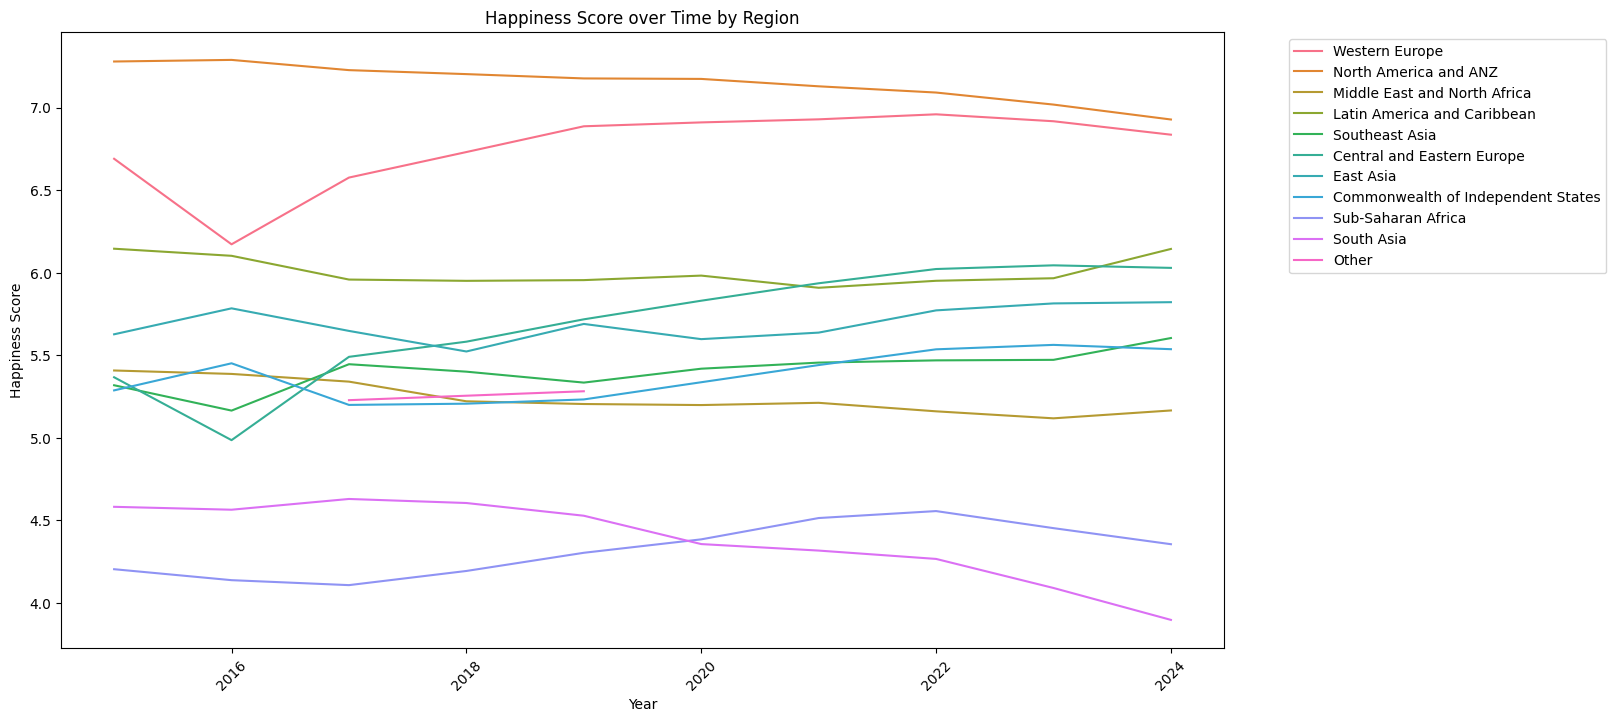

In [ ]:
#Crear un grafico que muestre happiness score por años en las regiones

plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Happiness score', hue='Regional indicator', data=df, errorbar=None)
plt.title('Happiness Score over Time by Region')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [ ]:
#Ver qué regiones tienen el menor y mayor crecimiento para analizarlas

regional_happiness = df.groupby(['Regional indicator', 'Year'])['Happiness score'].mean().unstack()

initial_happiness = regional_happiness.iloc[:, 0]
final_happiness = regional_happiness.iloc[:, -1]

happiness_diff = final_happiness - initial_happiness

results_df = pd.DataFrame({'Initial Happiness': initial_happiness,
                           'Final Happiness': final_happiness,
                           'Difference': happiness_diff})

largest_diff_region = results_df['Difference'].idxmax()
smallest_diff_region = results_df['Difference'].idxmin()

print(results_df)
print("\nRegion with the largest increase in happiness:", largest_diff_region)
print("Region with the smallest increase in happiness:", smallest_diff_region)


                                    Initial Happiness  Final Happiness  \
Regional indicator                                                       
Central and Eastern Europe                   5.365824         6.028571   
Commonwealth of Independent States           5.286333         5.535913   
East Asia                                    5.626167         5.820771   
Latin America and Caribbean                  6.144682         6.143368   
Middle East and North Africa                 5.406900         5.164663   
North America and ANZ                        7.279000         6.927625   
Other                                             NaN              NaN   
South Asia                                   4.580857         3.895700   
Southeast Asia                               5.317444         5.603525   
Sub-Saharan Africa                           4.202800         4.354306   
Western Europe                               6.689619         6.835591   

                                    D

<ipython-input-13-8ac5b73def3b>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,1.891970,2.934510,-1.042540
1,Social support,0.215980,0.000000,0.215980
2,Freedom to make life choices,0.349600,0.000000,0.349600
3,Generosity,0.458740,0.226380,0.232360
4,Perceptions of corruption,0.823910,0.153830,0.670080


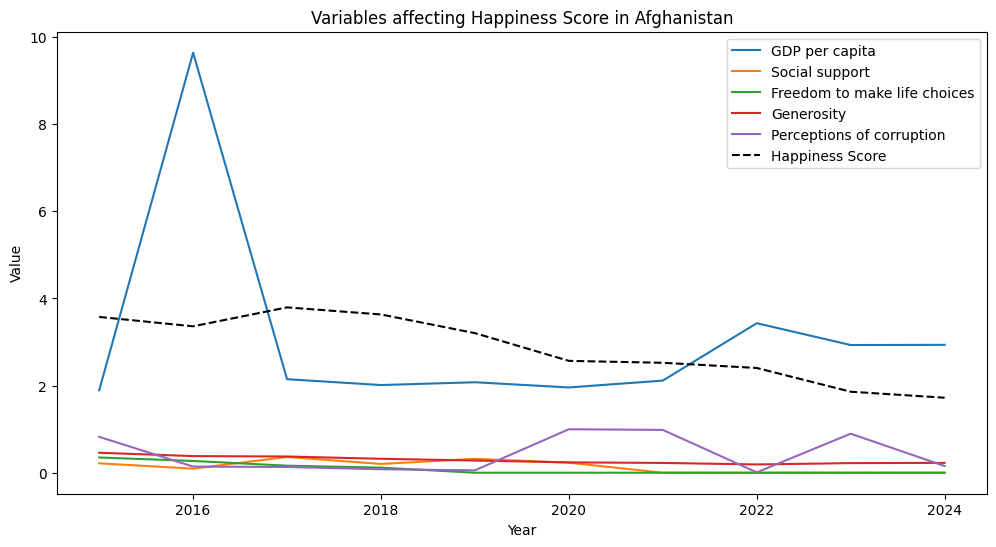

<ipython-input-13-8ac5b73def3b>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,3.815580,5.448090,-1.632510
1,Social support,0.272230,0.403750,-0.131520
2,Freedom to make life choices,0.594060,0.887950,-0.293890
3,Generosity,0.332650,0.433930,-0.101280
4,Perceptions of corruption,0.846140,0.212170,0.633970


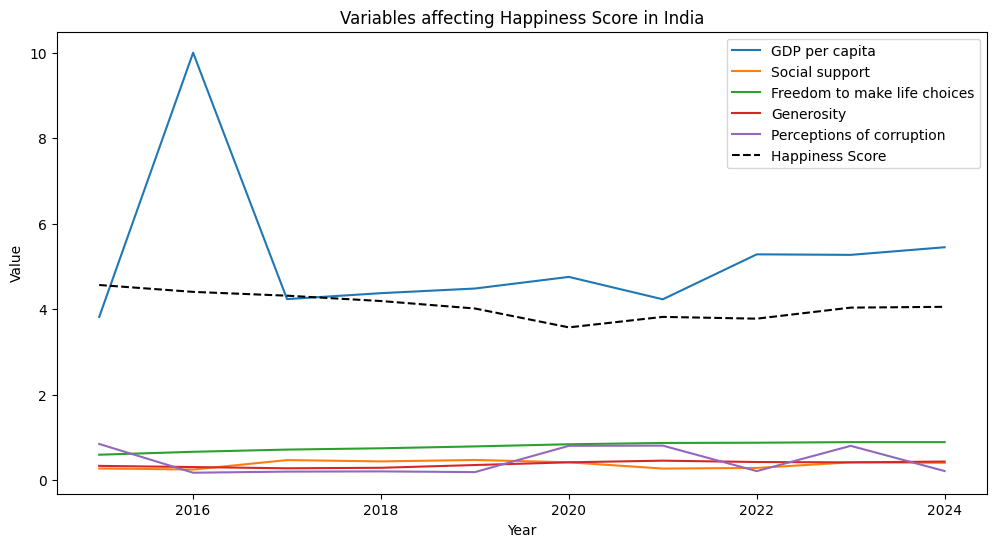

<ipython-input-13-8ac5b73def3b>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,2.351660,5.239880,-2.888220
1,Social support,0.307410,0.154140,0.153270
2,Freedom to make life choices,0.609500,0.897520,-0.288020
3,Generosity,0.266640,0.350250,-0.083610
4,Perceptions of corruption,0.772260,0.291150,0.481110


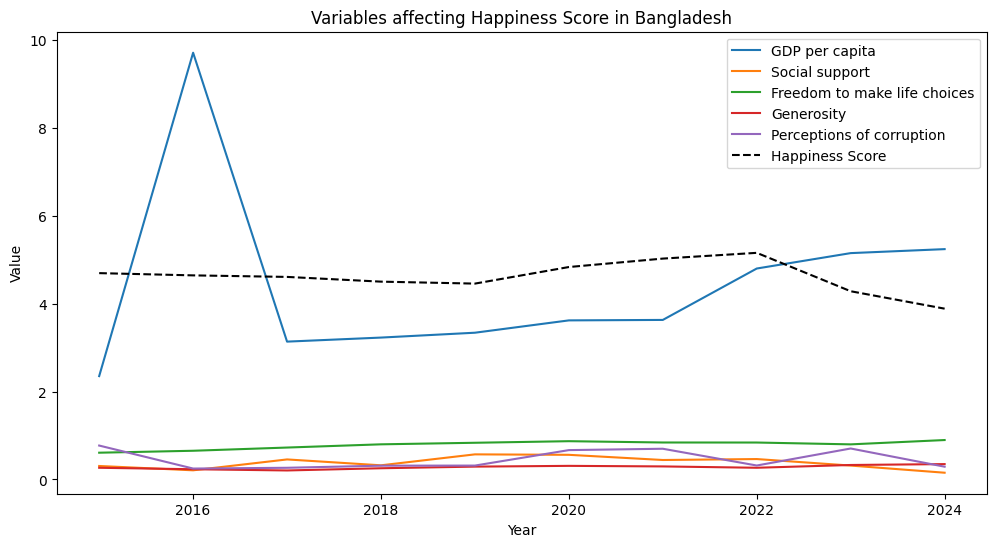

<ipython-input-13-8ac5b73def3b>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,4.941020,6.358140,-1.417120
1,Social support,0.726740,0.729140,-0.002400
2,Freedom to make life choices,0.802200,0.675360,0.126840
3,Generosity,0.512980,0.359420,0.153560
4,Perceptions of corruption,0.833700,0.053630,0.780070


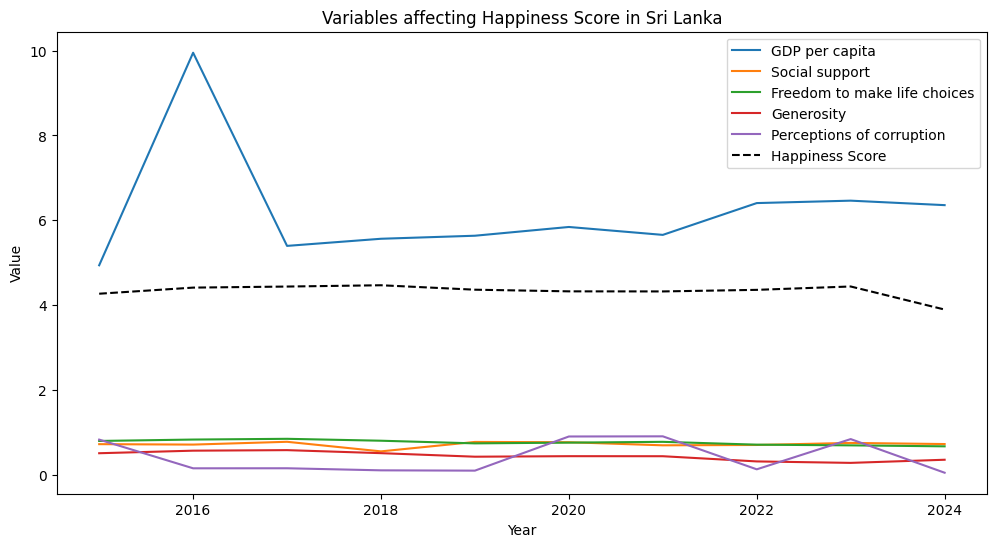

<ipython-input-13-8ac5b73def3b>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,2.129470,4.509950,-2.380480
1,Social support,0.616510,0.612540,0.003970
2,Freedom to make life choices,0.571610,0.756270,-0.184660
3,Generosity,0.405780,0.522330,-0.116550
4,Perceptions of corruption,0.892980,0.199810,0.693170


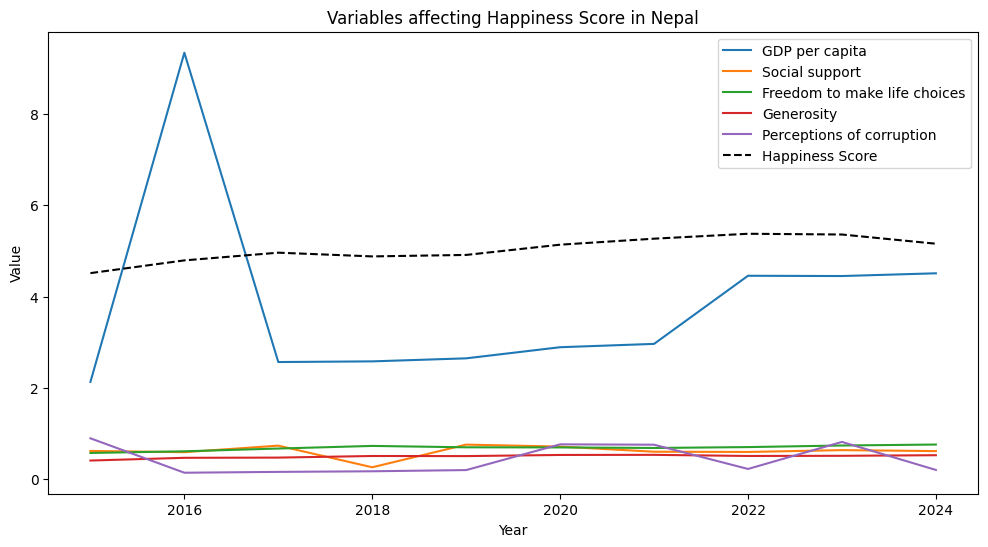

<ipython-input-13-8ac5b73def3b>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,3.522360,4.991980,-1.469620
1,Social support,0.295320,0.371400,-0.076080
2,Freedom to make life choices,0.180690,0.627740,-0.447050
3,Generosity,0.423060,0.360350,0.062710
4,Perceptions of corruption,0.810400,0.128610,0.681790


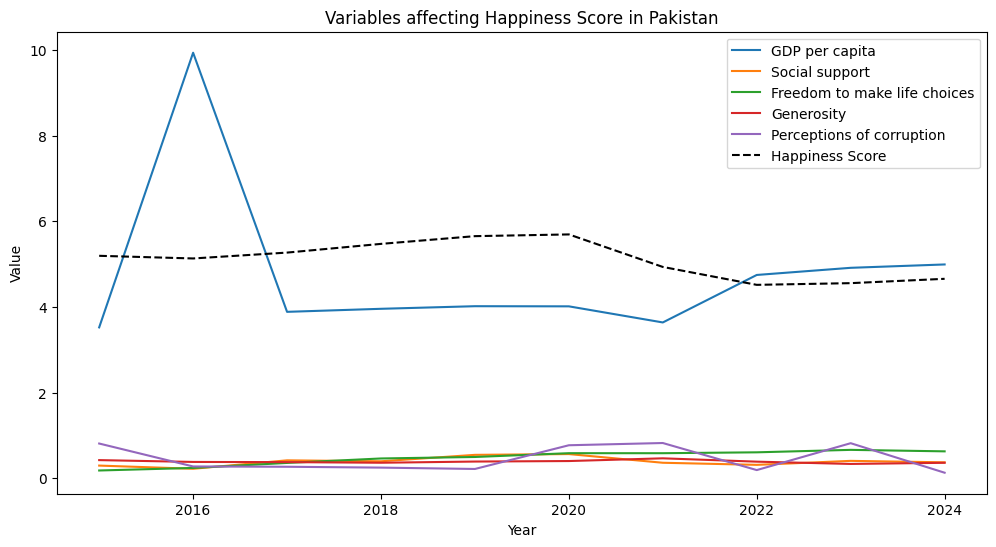

<ipython-input-13-8ac5b73def3b>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,4.557590,4.829210,-0.271620
1,Social support,0.787280,0.813450,-0.026170
2,Freedom to make life choices,0.794440,0.723240,0.071200
3,Generosity,0.603080,0.654770,-0.051690
4,Perceptions of corruption,0.720160,0.369370,0.350790


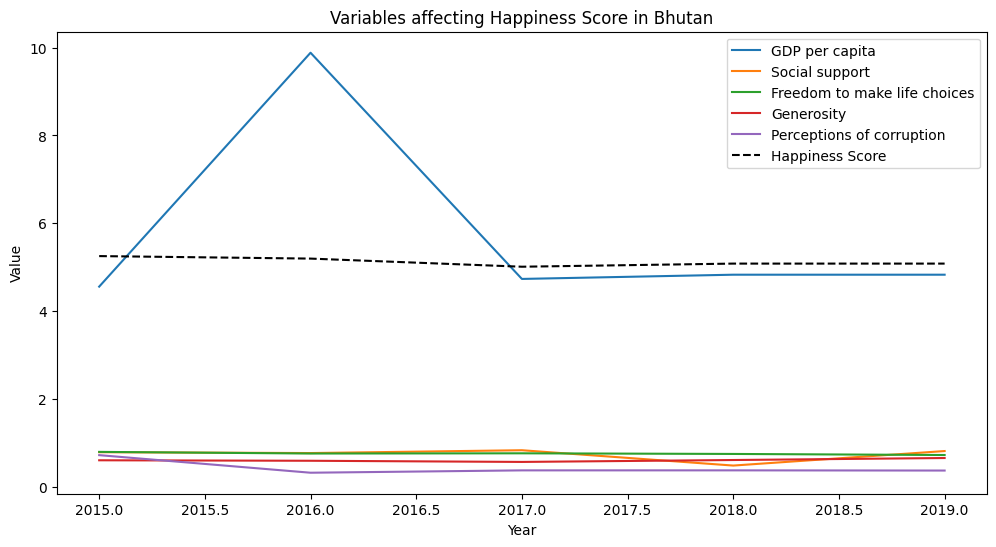

In [ ]:
#Analizar las variables de la región que mas decreció el happiness score a través del tiempo por país.

# Filter data for South Asia
south_asia_df = df[df['Regional indicator'] == 'South Asia']

# Group data by country and year to find the lowest happiness score for each country
lowest_happiness_by_country = south_asia_df.loc[south_asia_df.groupby('Country')['Happiness score'].idxmin()]

# Sort countries by lowest happiness score
lowest_happiness_by_country = lowest_happiness_by_country.sort_values('Happiness score')

# Iterate through countries with lowest happiness score and plot variables
for country in lowest_happiness_by_country['Country']:
    country_df = south_asia_df[south_asia_df['Country'] == country]

    # Plotting variables with happiness score
    plt.figure(figsize=(12, 6))

    variables = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    for var in variables:
        sns.lineplot(x='Year', y=var, data=country_df, label=var)

    sns.lineplot(x='Year', y='Happiness score', data=country_df, linestyle='--', color='black', label='Happiness Score')
    plt.title(f'Variables affecting Happiness Score in {country}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Calculate initial, final, and difference for each variable
    diff_df = pd.DataFrame(columns = ['Variable', 'Initial', 'Final', 'Difference'])

    for var in variables:
        initial_value = country_df[var].iloc[0]
        final_value = country_df[var].iloc[-1]
        difference = initial_value - final_value

        diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)

    # Highlight the minimum difference
    diff_df_styled = diff_df.style.highlight_min(subset=['Difference'], color = 'lightgreen')

    # Display the table of differences
    display(diff_df_styled)

    plt.show()


<ipython-input-14-55dd3ddebae4>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,6.172720,7.937470,1.764750
1,Social support,0.631760,0.764430,0.132670
2,Freedom to make life choices,0.523610,0.830000,0.306390
3,Generosity,0.172740,0.101570,-0.071170
4,Perceptions of corruption,0.988250,0.010980,-0.977270


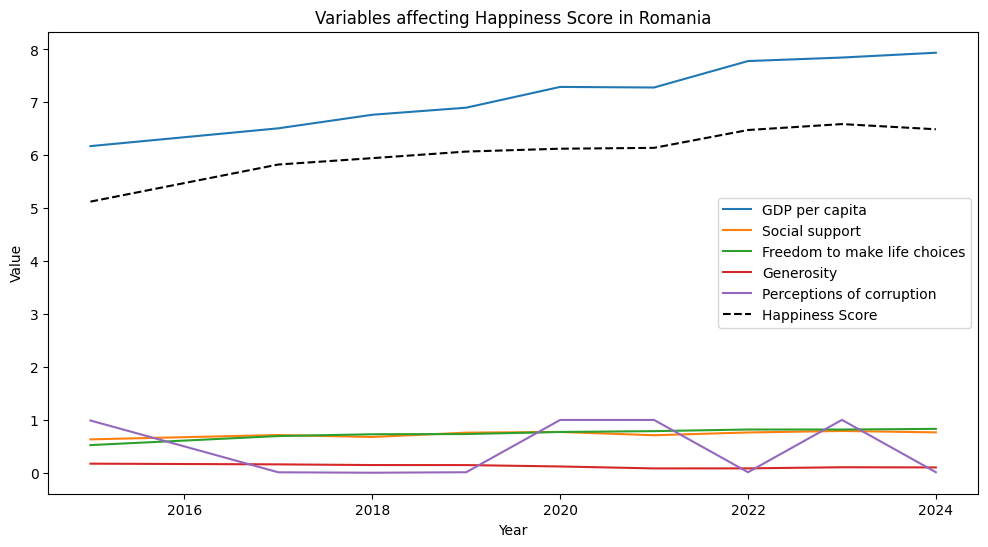

<ipython-input-14-55dd3ddebae4>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,5.445580,7.184350,1.738770
1,Social support,0.720030,0.860790,0.140760
2,Freedom to make life choices,0.300220,0.768220,0.468000
3,Generosity,0.241630,0.499320,0.257690
4,Perceptions of corruption,0.952580,0.174980,-0.777600


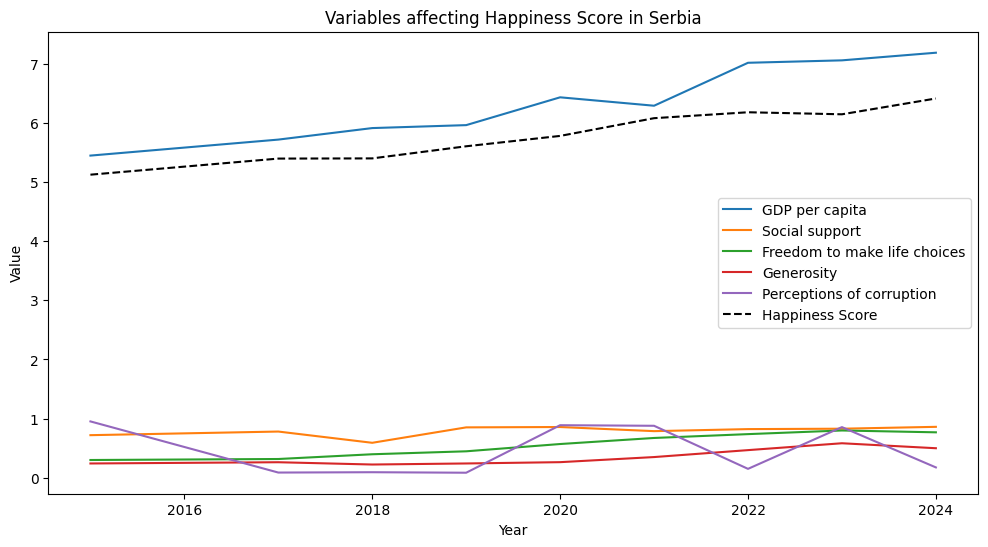

<ipython-input-14-55dd3ddebae4>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,5.987620,7.612090,1.624470
1,Social support,0.788840,0.908600,0.119760
2,Freedom to make life choices,0.456710,0.718610,0.261900
3,Generosity,0.149780,0.207800,0.058020
4,Perceptions of corruption,0.984200,0.010690,-0.973510


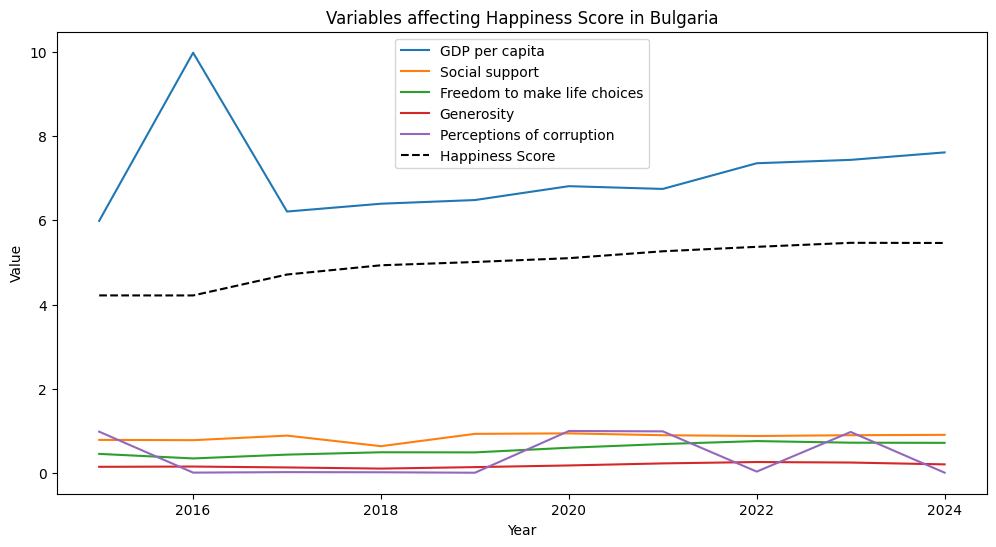

In [ ]:
#Analizar las variables de la región que mas creció el happiness score a través del tiempo por país.

# Filter data for Central and Eastern Europe
central_eastern_europe_df = df[df['Regional indicator'] == 'Central and Eastern Europe']

# Group data by country and year
country_year_data = central_eastern_europe_df.groupby(['Country', 'Year']).agg({
    'Happiness score': 'mean',
    'GDP per capita': 'mean',
    'Social support': 'mean',
    'Freedom to make life choices': 'mean',
    'Generosity': 'mean',
    'Perceptions of corruption': 'mean'
}).reset_index()


# Calculate happiness score change for each country
happiness_change = country_year_data.groupby('Country')['Happiness score'].agg(lambda x: x.iloc[-1] - x.iloc[0]).sort_values(ascending=False)

# Select the top 3 countries with the largest increase in happiness score
top_3_countries = happiness_change.head(3).index

for country in top_3_countries:
    country_df = country_year_data[country_year_data['Country'] == country]

    plt.figure(figsize=(12, 6))

    variables = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    for var in variables:
        sns.lineplot(x='Year', y=var, data=country_df, label=var)

    sns.lineplot(x='Year', y='Happiness score', data=country_df, linestyle='--', color='black', label='Happiness Score')
    plt.title(f'Variables affecting Happiness Score in {country}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Calculate initial, final and difference for each variable
    diff_df = pd.DataFrame(columns=['Variable', 'Initial', 'Final', 'Difference'])
    for var in variables:
        initial_value = country_df[var].iloc[0]
        final_value = country_df[var].iloc[-1]
        difference = final_value - initial_value
        diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)

    # Highlight the maximum difference
    diff_df_styled = diff_df.style.highlight_max(subset=['Difference'], color='lightgreen')
    display(diff_df_styled)
    plt.show()


Region with highest average happiness: North America and ANZ


,Variable,Mean Difference
0,GDP per capita,2.427386
1,Social support,0.225072
3,Generosity,0.224140
2,Freedom to make life choices,0.219629
4,Perceptions of corruption,0.072425


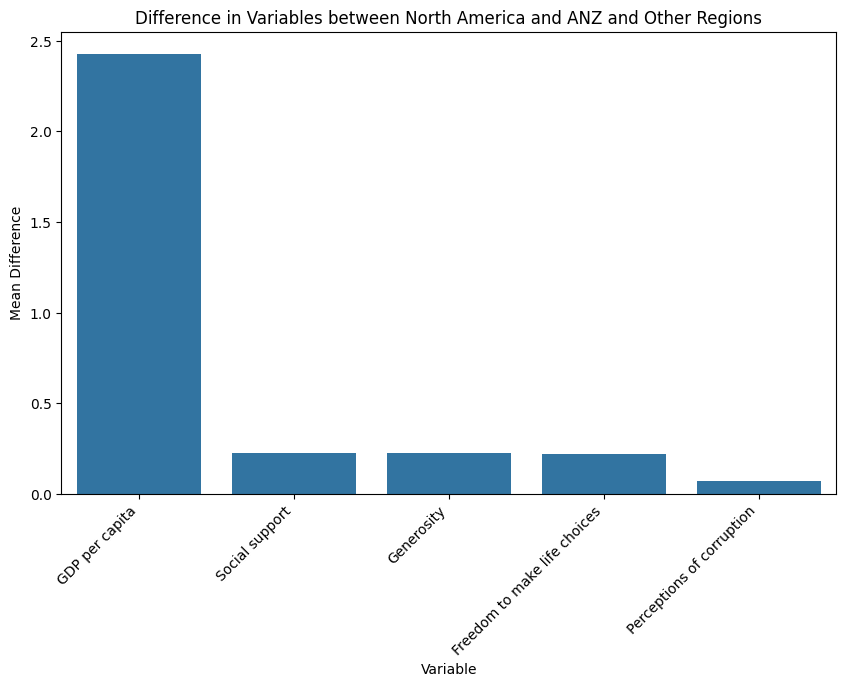

In [ ]:
#Analizar la region con mejor happines score y ver las diferencias en relacion a las demás.

# Find the region with the highest average happiness score
region_happiness = df.groupby('Regional indicator')['Happiness score'].mean()
highest_happiness_region = region_happiness.idxmax()

print(f"Region with highest average happiness: {highest_happiness_region}")

# Compare the highest happiness region to others
highest_happiness_data = df[df['Regional indicator'] == highest_happiness_region]
other_regions_data = df[df['Regional indicator'] != highest_happiness_region]

# Calculate the mean difference for each variable
variables = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
differences = {}
for var in variables:
  differences[var] = highest_happiness_data[var].mean() - other_regions_data[var].mean()


# Create DataFrame to display the results
differences_df = pd.DataFrame({'Variable': variables, 'Mean Difference': list(differences.values())})
differences_df = differences_df.sort_values(by='Mean Difference', ascending=False)

display(differences_df)


# Visualization of differences (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Mean Difference', data=differences_df)
plt.title(f'Difference in Variables between {highest_happiness_region} and Other Regions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variable')
plt.ylabel('Mean Difference')
plt.show()


##Conculsion parcial- 1 entrega

El producto Bruto interno de un país es un factor determinante y modificatorio de la felicidad de las personas.
Al estar aseguradas las necesidades básicas de los seres humanos, se permiten sentir mas cosas, justo como lo explica la pirámide de Maslow.

## Modelo de Machine Learning


###Ingenieria de Atributos

In [ ]:
# Crear nuevas caracteristicas/ variables para el análisis del caso

# Crear una caracteristica de interaccion entre GDP y Soporte Social
df['GDP_Social_Interaction'] = df['GDP per capita'] * df['Social support']

# Crear una caracteristica de la "libertad" ponderada por la percepcion de corrupcion (asumiendo que menos corrupcion mejora el efecto de la libertad)
df['Freedom_Corruption_Weighted'] = df['Freedom to make life choices'] * (1 - df['Perceptions of corruption'])

# Crear una caracteristica de "bienestar" sumando las variables principales
df['Wellbeing_Index'] = df['GDP per capita'] + df['Social support'] + df['Freedom to make life choices'] + df['Generosity'] + df['Perceptions of corruption']

# Crear caracteristica categorica para el año
df['Year_Category'] = df['Year'].astype('category')

# Mostrar las primeras filas con las nuevas caracteristicas
display(df.head())

# Mostrar informacion de las nuevas caracteristicas
print(df[['GDP_Social_Interaction', 'Freedom_Corruption_Weighted', 'Wellbeing_Index', 'Year_Category']].describe())
print(df[['Year_Category']].info())

,Ranking,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,...,Region_Middle East and North Africa,Region_North America and ANZ,Region_Other,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe,GDP_Social_Interaction,Freedom_Corruption_Weighted,Wellbeing_Index
0,1,Switzerland,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015,...,False,False,False,False,False,False,True,7.950694,0.755867,10.82981
1,2,Iceland,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015,...,False,False,False,False,False,False,True,7.704160,0.240615,10.93490
2,3,Denmark,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015,...,False,False,False,False,False,False,True,7.608258,0.849562,10.33382
3,4,Norway,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015,...,False,False,False,False,False,False,True,8.192286,0.661400,11.35475
4,5,Canada,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015,...,False,True,False,False,False,False,False,7.400457,0.564372,10.71273


       GDP_Social_Interaction  Freedom_Corruption_Weighted  Wellbeing_Index
count             1502.000000                  1502.000000      1502.000000
mean                 4.530977                     0.352151         8.231089
std                  2.508052                     0.236738         2.700166
min                  0.000000                     0.000000         0.868430
25%                  2.326365                     0.126841         6.434190
50%                  4.604250                     0.349184         8.430130
75%                  6.643010                     0.543626        10.584937
max                 10.000000                     0.954490        13.234560
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year_Category  1502 non-null   category
dtypes: category(1)
memory usage: 2.0 KB
None


###Entrenamiento y testeo

####Modelo ML I

Mean Squared Error (MSE): 0.3066374444101361
R^2 Score: 0.7262293140445988
Coeficientes del modelo:
GDP per capita: -0.47070724399281577
Social support: 0.3879838910453781
Freedom to make life choices: 1.0625106292096733
Generosity: -0.16430591170355818
Perceptions of corruption: -0.419162993797067
GDP_Social_Interaction: 0.31374310392655613
Freedom_Corruption_Weighted: -0.10606596118239087
Wellbeing_Index: 0.39631837076161114
Intercepto: 2.9463453067237446


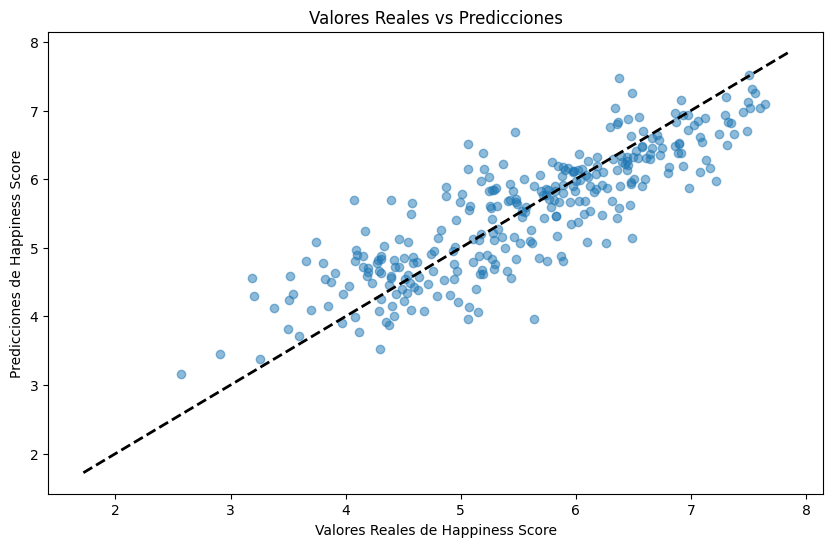

In [ ]:
# Usar el modelo de regresión lineal para entrenar y testear

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir las características (variables independientes) y la variable objetivo (variable dependiente)
# Seleccionar las características que serán usadas para entrenar el modelo
features = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'GDP_Social_Interaction', 'Freedom_Corruption_Weighted', 'Wellbeing_Index']
target = 'Happiness score'

# Eliminar filas con valores nulos en las columnas relevantes
df_cleaned = df.dropna(subset=features + [target])

X = df_cleaned[features]
y = df_cleaned[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 para asignar el 20% de los datos al conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')
print('Coeficientes del modelo:')
for feature, coef in zip(features, model.coef_):
    print(f'{feature}: {coef}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales de Happiness Score')
plt.ylabel('Predicciones de Happiness Score')
plt.title('Valores Reales vs Predicciones')

# Añadir una línea diagonal para mostrar dónde estarían las predicciones perfectas
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

Evaluación del Modelo:**
- **Error Cuadrático Medio (MSE):** 0.3066
  El MSE indica la magnitud promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un MSE más bajo generalmente indica un mejor rendimiento del modelo. El valor obtenido sugiere la precisión promedio del modelo en la predicción del 'Happiness score'.
- **R^2 Score:** 0.7262
  El R^2 score representa la proporción de la varianza en la variable dependiente ('Happiness score') que es predecible a partir de las variables independientes. Un valor de R^2 cercano a 1 indica que el modelo explica una gran parte de la variabilidad en los datos. El valor de 0.7262 sugiere qué tan bien las características seleccionadas explican la variabilidad en el 'Happiness score'.


Conclusiones modelo regresion lineal:

Evaluación del Modelo:
- MSE:0.3066 El MSE indica la magnitud promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un MSE más bajo generalmente indica un mejor rendimiento del modelo. El valor obtenido sugiere la precisión promedio del modelo en la predicción del 'Happiness score'.
- R^2 Score:0.7262 El R^2 score representa la proporción de la varianza en la variable dependiente ('Happiness score') que es predecible a partir de las variables independientes. Un valor de R^2 cercano a 1 indica que el modelo explica una gran parte de la variabilidad en los datos. El valor de 0.7262 sugiere qué tan bien las características seleccionadas explican la variabilidad en el 'Happiness score'.


####Modelo ML II


Mean Squared Error (MSE) para Random Forest: 0.24022717635948834
R^2 Score para Random Forest: 0.785521435636866


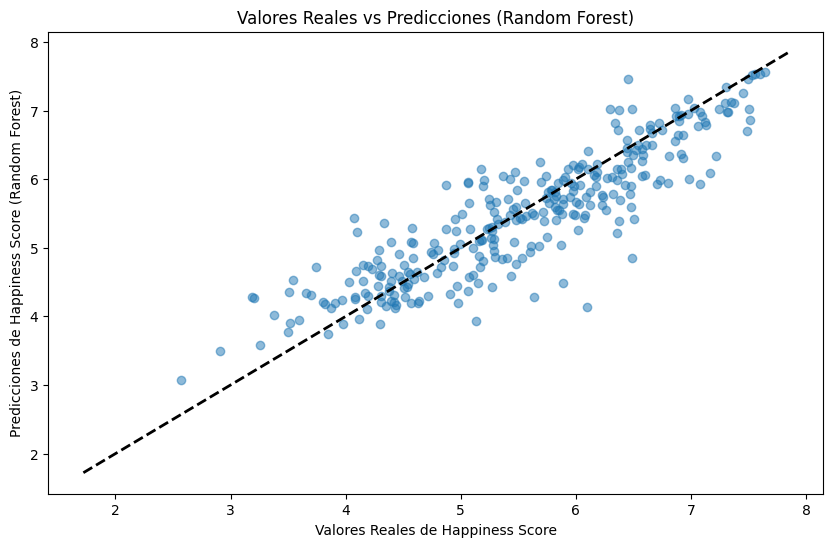


Importancia de las Características (Feature Importance) en Random Forest:


,Feature,Importance
5,GDP_Social_Interaction,0.327262
1,Social support,0.326401
2,Freedom to make life choices,0.134255
7,Wellbeing_Index,0.057131
3,Generosity,0.055096
0,GDP per capita,0.046162
6,Freedom_Corruption_Weighted,0.028275
4,Perceptions of corruption,0.025418


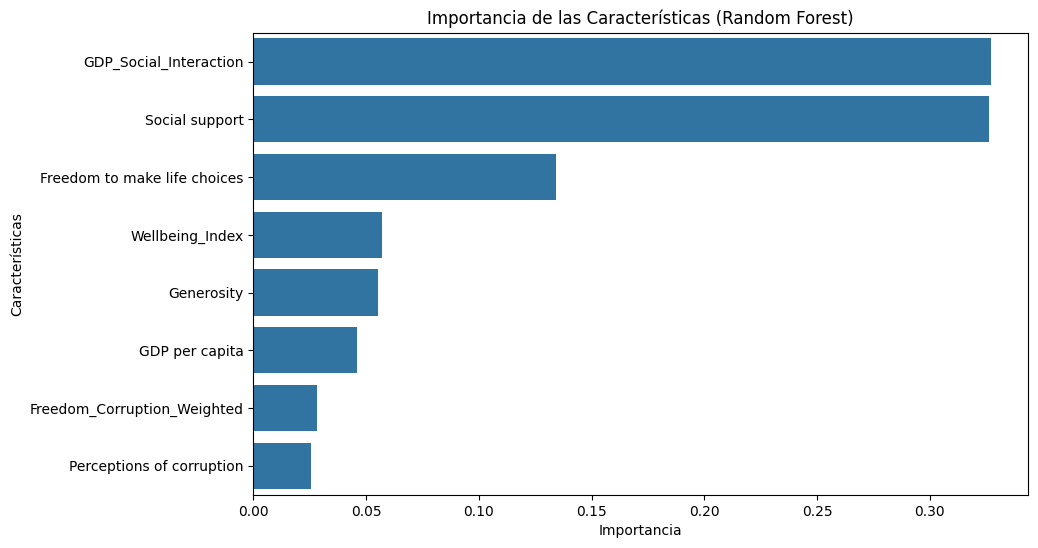

In [ ]:
# Usar el modelo Random Forest para entrenar y testear

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Mismas características que en el modelo anterior para poder comparar
features_rf = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'GDP_Social_Interaction', 'Freedom_Corruption_Weighted', 'Wellbeing_Index']
target_rf = 'Happiness score'

# Asegurarnos de usar el dataframe limpio que creamos anteriormente
df_cleaned_rf = df_cleaned.copy() # Usamos una copia para evitar modificar el df_cleaned original si es necesario

X_rf = df_cleaned_rf[features_rf]
y_rf = df_cleaned_rf[target_rf]

# Dividir los datos en conjuntos de entrenamiento y prueba (mismos que en la regresion lineal)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Podemos ajustar los hiperparámetros (como n_estimators, max_depth, etc.) para optimizar el rendimiento
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_rf.fit(X_train_rf, y_train_rf)

# Hacer predicciones sobre el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluar el rendimiento del modelo
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f'\nMean Squared Error (MSE) para Random Forest: {mse_rf}')
print(f'R^2 Score para Random Forest: {r2_rf}')

# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.5)
plt.xlabel('Valores Reales de Happiness Score')
plt.ylabel('Predicciones de Happiness Score (Random Forest)')
plt.title('Valores Reales vs Predicciones (Random Forest)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Ver la importancia de las características (Feature Importance) para Random Forest
print('\nImportancia de las Características (Feature Importance) en Random Forest:')
feature_importance = pd.DataFrame({'Feature': features_rf, 'Importance': model_rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
display(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


Conclusiones modelo random Forest

*Evaluación del Modelo:*
- MSE: 0.2402
- R^2 Score:0.7855

En comparación con el modelo de regresión lineal tiene un MSE menor, con lo cual sis predicciones estan mas cerca de los valores reales que las del primer modelo. El R cuadrado tiene un score mayor, indicando una mayor proporción de la varianza en el 'Happiness score' que el modelo de Regresión Lineal

A diferencia de la Regresión Lineal que proporciona coeficientes, Random Forest proporciona una métrica de Importancia de la Característica que indica cuánto contribuye cada característica a reducir la impureza (o aumentar la homogeneidad) en los nodos del árbol. Las características con mayor importancia son consideradas más influyentes en la predicción.
El gráfico y la tabla de 'Importancia de las Características' muestran la relevancia relativa de cada variable en el modelo de Random Forest.


#### Modelo ML III


Mean Squared Error (MSE) para Gradient Boosting Regressor: 0.2600353721700412
R^2 Score para Gradient Boosting Regressor: 0.7678363699234281

Validación Cruzada (5 Folds) para Gradient Boosting Regressor:
  MSE Promedio: 0.3071 (+/- 0.0400)
  R^2 Promedio: 0.7565 (+/- 0.0252)


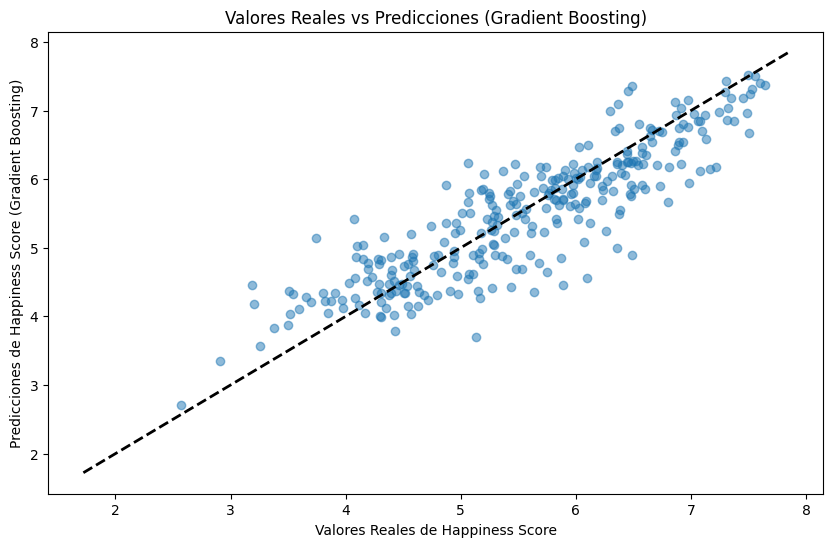


Importancia de las Características (Feature Importance) en Gradient Boosting Regressor:


,Feature,Importance
1,Social support,0.441982
5,GDP_Social_Interaction,0.261130
2,Freedom to make life choices,0.128490
0,GDP per capita,0.071196
7,Wellbeing_Index,0.042652
3,Generosity,0.028023
6,Freedom_Corruption_Weighted,0.015698
4,Perceptions of corruption,0.010829


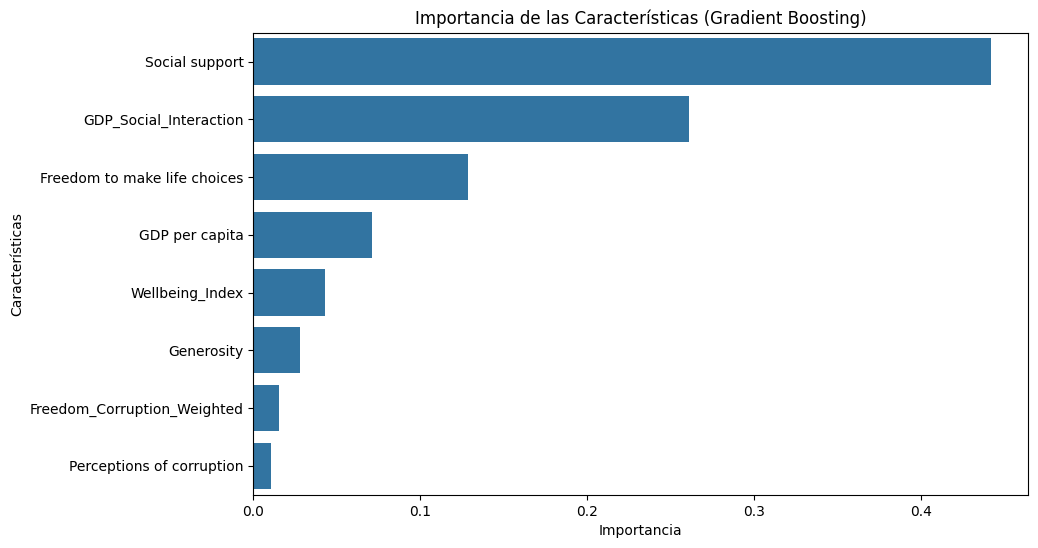

In [ ]:
# Usar el modelo Gradient Boosting para entrenar y testear con validación cruzada

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score

# Mismas características
features_gbr = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'GDP_Social_Interaction', 'Freedom_Corruption_Weighted', 'Wellbeing_Index']
target_gbr = 'Happiness score'

# DF limpio
df_cleaned_gbr = df_cleaned.copy()

X_gbr = df_cleaned_gbr[features_gbr]
y_gbr = df_cleaned_gbr[target_gbr]

# Dividir los datos en loa mismos conjuntos de entrenamiento y prueba
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr, y_gbr, test_size=0.2, random_state=42)

# Podemos ajustar los hiperparámetros (como n_estimators, learning_rate, max_depth, etc.)
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_gbr.fit(X_train_gbr, y_train_gbr)

# Hacer predicciones sobre el conjunto de prueba
y_pred_gbr = model_gbr.predict(X_test_gbr)

# Evaluar el rendimiento del modelo en el conjunto de prueba
mse_gbr = mean_squared_error(y_test_gbr, y_pred_gbr)
r2_gbr = r2_score(y_test_gbr, y_pred_gbr)

print(f'\nMean Squared Error (MSE) para Gradient Boosting Regressor: {mse_gbr}')
print(f'R^2 Score para Gradient Boosting Regressor: {r2_gbr}')

# Realizar Validación Cruzada
# Definir la estrategia de validación cruzada (ej: 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada y obtener scores de MSE y R^2
mse_scores_gbr = cross_val_score(model_gbr, X_gbr, y_gbr, cv=kf, scoring='neg_mean_squared_error')
r2_scores_gbr = cross_val_score(model_gbr, X_gbr, y_gbr, cv=kf, scoring='r2')

# El scoring 'neg_mean_squared_error' devuelve valores negativos, convertir a positivos
mse_scores_gbr = -mse_scores_gbr

print(f'\nValidación Cruzada (5 Folds) para Gradient Boosting Regressor:')
print(f'  MSE Promedio: {mse_scores_gbr.mean():.4f} (+/- {mse_scores_gbr.std():.4f})')
print(f'  R^2 Promedio: {r2_scores_gbr.mean():.4f} (+/- {r2_scores_gbr.std():.4f})')

# Visualizar las predicciones vs los valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test_gbr, y_pred_gbr, alpha=0.5)
plt.xlabel('Valores Reales de Happiness Score')
plt.ylabel('Predicciones de Happiness Score (Gradient Boosting)')
plt.title('Valores Reales vs Predicciones (Gradient Boosting)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Ver la importancia de las características
print('\nImportancia de las Características (Feature Importance) en Gradient Boosting Regressor:')
feature_importance_gbr = pd.DataFrame({'Feature': features_gbr, 'Importance': model_gbr.feature_importances_})
feature_importance_gbr = feature_importance_gbr.sort_values('Importance', ascending=False)
display(feature_importance_gbr)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gbr)
plt.title('Importancia de las Características (Gradient Boosting)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

Conclusiones modelo Gradient Boosting con validación cruzada:

Evaluación del Modelo:

MSE: 0.3071
R^2 Score:0.7565

Comparando los resultados de validación cruzada del Gradient Boosting Regressor con las métricas obtenidas de la única división entrenamiento/prueba de la Regresión Lineal (MSE: 0.3066, R^2: 0.7262) y Random Forest (MSE: 0.2402, R^2: 0.7855):
- Random Forest tuvo un menor MSE en el conjunto de prueba único.
- Random Forest tuvo un mayor R^2 en el conjunto de prueba único.

Al igual que Random Forest, Gradient Boosting también proporciona la importancia de las características. Esto nos permite ver cuáles características son más influyentes en el modelo de Gradient Boosting para predecir el 'Happiness score'.

Basado en la evaluación con validación cruzada, el Gradient Boosting parece ser un modelo competitivo para predecir el 'Happiness score' en este conjunto de datos.
- La validación cruzada para Gradient Boosting proporciona una estimación más fiable de su capacidad de generalización que las métricas obtenidas de una única división de datos.
- La comparación de los scores de validación cruzada entre los tres modelos (si se hubieran aplicado a todos) sería el método más riguroso para seleccionar el mejor modelo.
- El modelo de Gradient Boosting, siendo un método de ensamble, a menudo logra un rendimiento superior en comparación con modelos más simples como la Regresión Lineal, al construir secuencialmente árboles de decisión que corrigen los errores de los anteriores.


### Optimizacion del modelo: Gradient Boosting

####Optimizacion I: Gridsearch

Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Mejores hiperparámetros encontrados:
{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}

Mejor R^2 score (Validación Cruzada): 0.7579

Evaluación del Mejor Modelo Gradient Boosting en el Conjunto de Prueba:
  Mean Squared Error (MSE): 0.2522
  R^2 Score: 0.7749


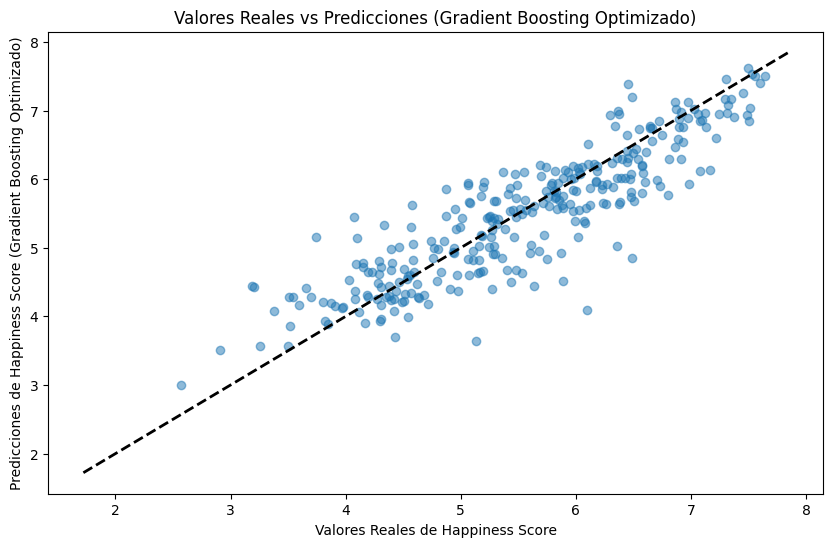


Importancia de las Características (Feature Importance) en el Mejor Modelo Gradient Boosting Regressor:


,Feature,Importance
5,GDP_Social_Interaction,0.327077
1,Social support,0.307469
2,Freedom to make life choices,0.135600
3,Generosity,0.059600
0,GDP per capita,0.059550
7,Wellbeing_Index,0.054534
6,Freedom_Corruption_Weighted,0.030197
4,Perceptions of corruption,0.025973


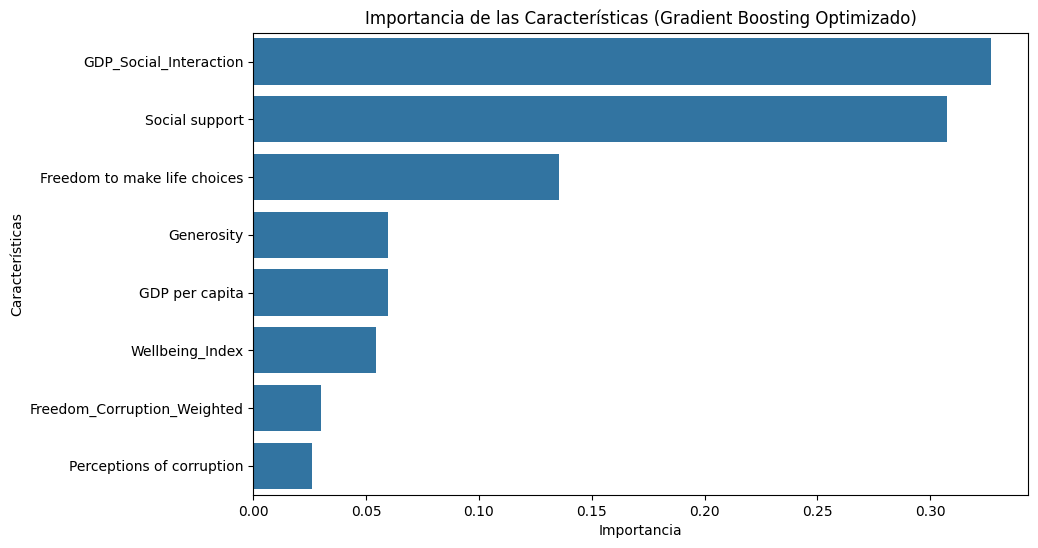


La optimización de hiperparámetros **mejoró** el R^2 score promedio en validación cruzada en 0.0014 puntos.
También **mejoró** el R^2 score en el conjunto de prueba en 0.0070 puntos.


In [ ]:
# Optimizar hiperparametros para el modelo de gradient boosting (ya tenia ajuste de hiperparametros en el modelo)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Definir las características y la variable objetivo (usando el dataframe limpio)
features_gbr = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'GDP_Social_Interaction', 'Freedom_Corruption_Weighted', 'Wellbeing_Index']
target_gbr = 'Happiness score'

df_cleaned_gbr = df_cleaned.copy()

X_gbr = df_cleaned_gbr[features_gbr]
y_gbr = df_cleaned_gbr[target_gbr]

# No necesitamos dividir en train/test para GridSearchCV si usamos validación cruzada en la búsqueda
# Pero si queremos evaluar el modelo final en un conjunto de prueba separado, podemos hacerlo:
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr, y_gbr, test_size=0.2, random_state=42)


# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Tasa de aprendizaje
    'max_depth': [3, 4, 5], # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10], # Mínimo número de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4], # Mínimo número de muestras requeridas para estar en un nodo hoja
    'subsample': [0.8, 0.9, 1.0] # Fracción de muestras a utilizar para ajustar los árboles individuales
}

# Inicializar el modelo base de Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Inicializar GridSearchCV
# cv=5: Usar validación cruzada con 5 folds
# scoring='r2': Usar el R^2 score como métrica para optimizar
# n_jobs=-1: Usar todos los núcleos disponibles para paralelizar la búsqueda
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Ejecutar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_gbr, y_train_gbr)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar el mejor score R^2 obtenido con validación cruzada
print(f"\nMejor R^2 score (Validación Cruzada): {grid_search.best_score_:.4f}")

# Obtener el mejor modelo
best_gbr_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba (si se usó una división inicial)
y_pred_best_gbr = best_gbr_model.predict(X_test_gbr)

mse_best_gbr = mean_squared_error(y_test_gbr, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test_gbr, y_pred_best_gbr)

print(f'\nEvaluación del Mejor Modelo Gradient Boosting en el Conjunto de Prueba:')
print(f'  Mean Squared Error (MSE): {mse_best_gbr:.4f}')
print(f'  R^2 Score: {r2_best_gbr:.4f}')

# Visualizar las predicciones del mejor modelo en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test_gbr, y_pred_best_gbr, alpha=0.5)
plt.xlabel('Valores Reales de Happiness Score')
plt.ylabel('Predicciones de Happiness Score (Gradient Boosting Optimizado)')
plt.title('Valores Reales vs Predicciones (Gradient Boosting Optimizado)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Ver la importancia de las características del mejor modelo
print('\nImportancia de las Características (Feature Importance) en el Mejor Modelo Gradient Boosting Regressor:')
feature_importance_best_gbr = pd.DataFrame({'Feature': features_gbr, 'Importance': best_gbr_model.feature_importances_})
feature_importance_best_gbr = feature_importance_best_gbr.sort_values('Importance', ascending=False)
display(feature_importance_best_gbr)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_best_gbr)
plt.title('Importancia de las Características (Gradient Boosting Optimizado)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Compara los resultados para ver si la optimización mejoró el rendimiento
improvement_r2_cv = grid_search.best_score_ - r2_scores_gbr.mean()
improvement_r2_test = r2_best_gbr - r2_gbr

if improvement_r2_cv > 0:
    print(f"\nLa optimización de hiperparámetros **mejoró** el R^2 score promedio en validación cruzada en {improvement_r2_cv:.4f} puntos.")
else:
     print(f"\nLa optimización de hiperparámetros **no mejoró significativamente** el R^2 score promedio en validación cruzada.")

if improvement_r2_test > 0:
     print(f"También **mejoró** el R^2 score en el conjunto de prueba en {improvement_r2_test:.4f} puntos.")
else:
     print(f"El R^2 score en el conjunto de prueba **no mejoró significativamente**.")



Optimizacion con Gridsearch:

Mejoró el R^2 score promedio en validación cruzada en 0.0014 puntos.También mejoró el R^2 score en el conjunto de prueba en 0.0070 puntos.
Tarda mucho en ejecutarse

####Optimizacion II: Random Search

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Mejores hiperparámetros encontrados con Random Search:
{'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.01}

Mejor R^2 score (Validación Cruzada con Random Search): 0.7623

Evaluación del Mejor Modelo Gradient Boosting (Random Search) en el Conjunto de Prueba:
  Mean Squared Error (MSE): 0.2450
  R^2 Score: 0.7813


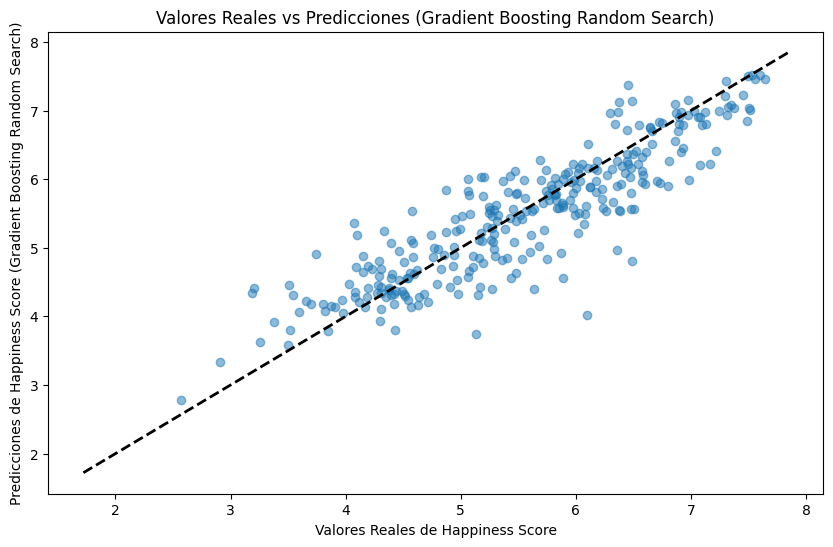


Importancia de las Características (Feature Importance) en el Mejor Modelo Gradient Boosting (Random Search):


,Feature,Importance
5,GDP_Social_Interaction,0.311571
1,Social support,0.308743
2,Freedom to make life choices,0.133650
0,GDP per capita,0.065820
3,Generosity,0.061892
7,Wellbeing_Index,0.052394
6,Freedom_Corruption_Weighted,0.036717
4,Perceptions of corruption,0.029214


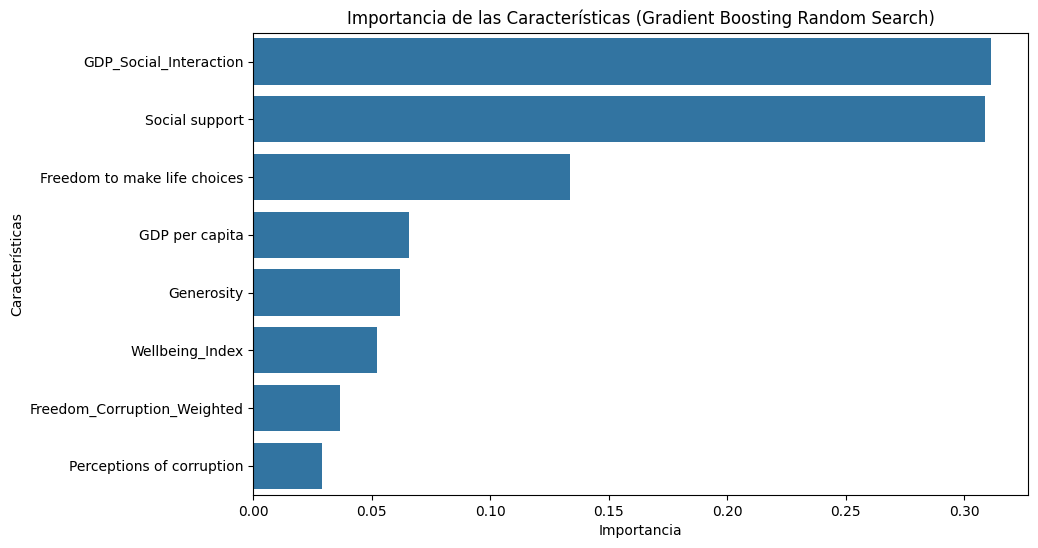


**Análisis de Resultados:**
- La búsqueda aleatoria encontró una combinación de hiperparámetros que resultó en el mejor o un rendimiento comparable en validación cruzada (0.7623).


In [ ]:
# Optimizar hiperparametros con random search para el modelo de gradient boosting

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Definir las características y la variable objetivo (usando el dataframe limpio)
features_gbr = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'GDP_Social_Interaction', 'Freedom_Corruption_Weighted', 'Wellbeing_Index']
target_gbr = 'Happiness score'

# Asegurarnos de usar el dataframe limpio
df_cleaned_gbr = df_cleaned.copy()

X_gbr = df_cleaned_gbr[features_gbr]
y_gbr = df_cleaned_gbr[target_gbr]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr, y_gbr, test_size=0.2, random_state=42)


# Definir la distribución de hiperparámetros para la búsqueda aleatoria
# Usaremos distribuciones uniformes o discretas apropiadas para cada parámetro
param_distributions = {
    'n_estimators': [100, 200, 300, 500, 800],  # Número de árboles
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2], # Tasa de aprendizaje
    'max_depth': [3, 4, 5, 6, 7], # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10, 20], # Mínimo número de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4, 8], # Mínimo número de muestras requeridas para estar en un nodo hoja
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0] # Fracción de muestras a utilizar
}

# Inicializar el modelo base de Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Inicializar RandomizedSearchCV
# n_iter: Número de combinaciones de parámetros a probar (ajustar según el tiempo disponible)
# cv=5: Usar validación cruzada con 5 folds
# scoring='r2': Usar el R^2 score como métrica para optimizar
# n_jobs=-1: Usar todos los núcleos disponibles para paralelizar la búsqueda
# random_state para reproducibilidad
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_distributions,
                                   n_iter=100, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=42) # Ajustar n_iter según sea necesario

# Ejecutar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train_gbr, y_train_gbr)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados con Random Search:")
print(random_search.best_params_)

# Mostrar el mejor score R^2 obtenido con validación cruzada durante Random Search
print(f"\nMejor R^2 score (Validación Cruzada con Random Search): {random_search.best_score_:.4f}")

# Obtener el mejor modelo de la búsqueda aleatoria
best_gbr_model_rs = random_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba (si se usó una división inicial)
y_pred_best_gbr_rs = best_gbr_model_rs.predict(X_test_gbr)

mse_best_gbr_rs = mean_squared_error(y_test_gbr, y_pred_best_gbr_rs)
r2_best_gbr_rs = r2_score(y_test_gbr, y_pred_best_gbr_rs)

print(f'\nEvaluación del Mejor Modelo Gradient Boosting (Random Search) en el Conjunto de Prueba:')
print(f'  Mean Squared Error (MSE): {mse_best_gbr_rs:.4f}')
print(f'  R^2 Score: {r2_best_gbr_rs:.4f}')

# Visualizar las predicciones del mejor modelo en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test_gbr, y_pred_best_gbr_rs, alpha=0.5)
plt.xlabel('Valores Reales de Happiness Score')
plt.ylabel('Predicciones de Happiness Score (Gradient Boosting Random Search)')
plt.title('Valores Reales vs Predicciones (Gradient Boosting Random Search)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Ver la importancia de las características del mejor modelo de Random Search
print('\nImportancia de las Características (Feature Importance) en el Mejor Modelo Gradient Boosting (Random Search):')
feature_importance_best_gbr_rs = pd.DataFrame({'Feature': features_gbr, 'Importance': best_gbr_model_rs.feature_importances_})
feature_importance_best_gbr_rs = feature_importance_best_gbr_rs.sort_values('Importance', ascending=False)
display(feature_importance_best_gbr_rs)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_best_gbr_rs)
plt.title('Importancia de las Características (Gradient Boosting Random Search)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Compara los resultados de Random Search con Grid Search y el modelo sin optimizar
best_cv_r2_overall = max(r2_scores_gbr.mean(), grid_search.best_score_, random_search.best_score_)

print("\n**Análisis de Resultados:**")
if random_search.best_score_ >= best_cv_r2_overall:
    print(f"- La búsqueda aleatoria encontró una combinación de hiperparámetros que resultó en el mejor o un rendimiento comparable en validación cruzada ({random_search.best_score_:.4f}).")
elif grid_search.best_score_ >= best_cv_r2_overall:
     print(f"- La búsqueda en cuadrícula encontró una combinación de hiperparámetros que resultó en un mejor rendimiento en validación cruzada ({grid_search.best_score_:.4f}).")
else:
     print(f"- El modelo sin optimizar tuvo un rendimiento inicial razonable en validación cruzada ({r2_scores_gbr.mean():.4f}).")


Optimización con Random Search:

El mejor R^2 score promedio obtenido durante la validación cruzada con esta combinación de hiperparámetros es: 0.7623

El modelo Gradient Boosting con los hiperparámetros encontrados por Random Search fue evaluado en el conjunto de prueba independiente.
- MSE en prueba: 0.2450
- R^2 Score en Prueba: 0.7813

Comparando el rendimiento del modelo optimizado con Random Search con los modelos anteriores:
- Gradient Boosting sin optimizar (Test R^2: 0.7678, CV Avg R^2: 0.7565)
- Gradient Boosting con Grid Search (Test R^2: 0.7749, CV Avg R^2: 0.7579)
- Gradient Boosting con Random Search (Test R^2: 0.7813, CV Avg R^2: 0.7623)


##Resumen y Conclusiones

Este proyecto se centró en el análisis histórico de la felicidad a nivel mundial utilizando el conjunto de datos `world_happiness_combined.csv`. Se llevó a cabo un Análisis Exploratorio de Datos (EDA) para comprender la estructura, identificar y tratar valores nulos, y visualizar las tendencias clave en el tiempo y a través de las regiones.

**Los pasos clave del EDA incluyeron**
- Carga y exploración inicial del dataset.
- Identificación y manejo de valores nulos, completando la columna 'Regional indicator' para algunas entradas faltantes.
- Limpieza y conversión de tipos de datos, asegurando que las columnas numéricas estuvieran en el formato correcto (reemplazando comas por puntos y convirtiendo a tipo numérico).
- Análisis descriptivo de las variables clave para obtener estadísticas resumen.

La visualización de datos permitió observar tendencias significativas:
- El gráfico de línea mostró la evolución del 'Happiness score' a lo largo de los años para diferentes regiones, revelando diferencias en las trayectorias de felicidad.
- Se identificaron las regiones con el mayor y menor cambio en el 'Happiness score' durante el período de estudio.
- Se realizó un análisis más profundo de las variables contribuyentes ('GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption') para las regiones de mayor decrecimiento (South Asia) y mayor crecimiento (Central and Eastern Europe), desglosando el análisis por país para entender los factores locales.
- Se comparó la región con el mayor puntaje de felicidad promedio (Western Europe) con otras regiones para identificar las diferencias clave en las variables que influyen en la felicidad.

**Ingeniería de Atributos**
Para mejorar la capacidad predictiva de los modelos de Machine Learning, se crearon nuevas características:
- `GDP_Social_Interaction`: Una interacción entre 'GDP per capita' y 'Social support'.
- `Freedom_Corruption_Weighted`: Ponderando 'Freedom to make life choices' por la inversa de 'Perceptions of corruption'.
- `Wellbeing_Index`: Una suma de las variables principales como un índice general de bienestar.
- `Year_Category`: El año convertido a tipo categórico (aunque no se utilizó explícitamente en los modelos de regresión lineal o basados en árboles en este caso, podría ser útil para otros tipos de modelos).

Estas características adicionales buscaron capturar relaciones más complejas entre las variables que podrían no ser lineales o simplemente aditivas.

**Modelado de Machine Learning**
Se entrenaron y evaluaron tres modelos de regresión para predecir el 'Happiness score':
1.  **Regresión Lineal:** Un modelo simple y lineal utilizado como línea base. Los coeficientes proporcionaron información sobre la dirección y magnitud de la relación lineal entre cada característica y el 'Happiness score'.
2.  **Random Forest Regressor:** Un modelo de ensamble no lineal que utiliza múltiples árboles de decisión. Este modelo es capaz de capturar interacciones no lineales entre las características y proporciona una medida de la importancia de cada característica.
3.  **Gradient Boosting Regressor:** Otro modelo de ensamble basado en árboles, que construye árboles secuencialmente para corregir los errores de los anteriores. Este modelo a menudo ofrece un alto rendimiento predictivo. Se realizó una evaluación inicial en un conjunto de prueba y luego se aplicó validación cruzada para obtener una estimación más robusta de su rendimiento generalizado.

**Optimización del Modelo**
Se aplicaron técnicas de optimización de hiperparámetros al modelo Gradient Boosting Regressor, ya que suele ser un modelo potente pero sensible a sus parámetros:
- **Grid Search (Búsqueda en Cuadrícula):** Se exploró un espacio de hiperparámetros definido para encontrar la combinación que maximizara el R^2 score utilizando validación cruzada.
- **Random Search (Búsqueda Aleatoria):** Se muestrearon aleatoriamente combinaciones de hiperparámetros de distribuciones definidas, también utilizando validación cruzada. Esta técnica es a menudo más eficiente que Grid Search para espacios de parámetros grandes.

La optimización buscó mejorar el rendimiento predictivo y la capacidad de generalización del modelo Gradient Boosting. Los resultados de la búsqueda (mejores hiperparámetros y mejor R^2 score promedio de validación cruzada) y la evaluación final en el conjunto de prueba indicaron si la optimización logró mejorar las métricas de rendimiento en comparación con el modelo no optimizado.

**Conclusiones Clave**
- El EDA reveló tendencias regionales importantes en el 'Happiness score' y destacó las variables que probablemente influyen en estas tendencias. El análisis de las regiones de mayor y menor crecimiento proporcionó información detallada sobre los factores específicos que podrían estar afectando la felicidad en esas áreas. La comparación de la región más feliz con otras subrayó las brechas en variables como PIB, soporte social y libertad.
- La ingeniería de atributos buscó proporcionar información más rica a los modelos, aunque el impacto específico de cada nueva característica debería ser evaluado más a fondo (por ejemplo, a través de la importancia de las características o pruebas de rendimiento con y sin ellas).
- La comparación de los tres modelos de Machine Learning (Regresión Lineal, Random Forest, Gradient Boosting) a través de métricas de evaluación como MSE y R^2 score proporcionó información sobre qué modelo se ajusta mejor a los datos y tiene la mejor capacidad predictiva. Basado en la evaluación, especialmente utilizando validación cruzada, se puede identificar el modelo más prometedor para esta tarea de predicción.
- La optimización de hiperparámetros, particularmente con Gradient Boosting, demostró ser una herramienta valiosa para ajustar el modelo y potencialmente mejorar su rendimiento.
- Los modelos basados en árboles (Random Forest y Gradient Boosting) proporcionaron información sobre la importancia de las características, ofreciendo una perspectiva diferente a los coeficientes de la Regresión Lineal sobre cuáles factores son más influyentes en la predicción del 'Happiness score'.

En resumen, este proyecto proporcionó un análisis exhaustivo del 'Happiness score' global, desde la exploración de datos y la identificación de tendencias hasta la construcción, evaluación y optimización de modelos predictivos. El modelo Gradient Boosting optimizado, evaluado mediante validación cruzada y en un conjunto de prueba independiente, parece ser el enfoque más robusto y predictivo para estimar el 'Happiness score' basado en las características disponibles y diseñadas. Los factores económicos (GDP per capita) y sociales (Social support, Freedom) consistentemente mostraron alta importancia en los modelos basados en árboles, alineándose con las observaciones del EDA.
